# Cumulative Mass Residual Rainfall Calculation

__Background:__ Mass Residual Rainfall is a useful calculation of the cumulative difference from the mean rainfall. 

__Before you run this notebook:__ You need access to r78 to use the `load_rainfall` function

__What does this notebook do?:__ Calculates mass residual rainfall for an area of interest


__Date:__ Oct 2018

__Authors:__ Bex Dunn, Vanessa Newey, Neil Symington, Claire Krause, Leo Lymburner

### load modules

In [50]:
%load_ext autoreload
%autoreload 2

#get modules from standard libraries

import os.path
import numpy as np
import sys
import xarray as xr

from datetime import datetime
import matplotlib.pyplot as plt

#modules for datacube
import datacube
from datacube.utils import geometry
from datacube.storage.storage import write_dataset_to_netcdf
from datacube.helpers import write_geotiff

# Import external functions from dea-notebooks
sys.path.append(os.path.expanduser('~/dea-notebooks/10_Scripts/'))
from RainfallTools import load_rainfall

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Choose a time period and location to calculate residual mass curve.
 - Note: please select whole months here, not days, as a month with only two days may negatively affect your mass residual curve

In [26]:
## Choose a query area and time
##note: datacube is inclusive of both ends of the interval.

query = {
        'lat': (-35.25, -35.35),
        'lon': (149.05, 149.17),
        'time':('2010-01-01', '2013-03-31')
        }

### load rainfall data

In [47]:
dc = datacube.Datacube(app='dc-BOMrainfall')
#use our function to load the rainfall grids
rainfall = load_rainfall(query)

## calculate rainfall mass residual

In [31]:
#group rainfall data by day of year
rainfall_bydayofyear = rainfall.groupby('time.dayofyear')

In [32]:
# get the mean rainfall by day over this time period
rainfall_dayofyear_mean = rainfall.groupby('time.dayofyear').mean(dim='time')

In [34]:
#calculate the cumulative mean rainfall by day of year
cumulative_mean_rainfall = rainfall_dayofyear_mean.rainfall[cumulative_rainfall.time.dt.dayofyear-1].cumsum(dim='time',keep_attrs=True)

### Calculate the cumulative mass residual by subtracting the cumulative mean rainfall from the cumulative rainfall

In [36]:
mass_residual= cumulative_rainfall.rainfall-cumulative_mean_rainfall

### The spatially-averaged cumulative mass residual rainfall for our area of interest

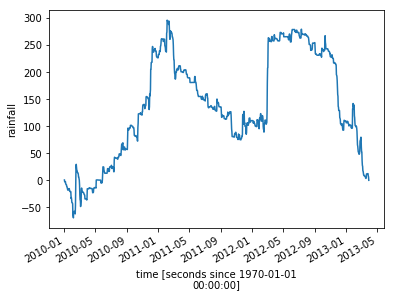

In [37]:
mass_residual.mean(dim=('latitude','longitude')).plot()

### The cumulative mass residual rainfall for one timestep

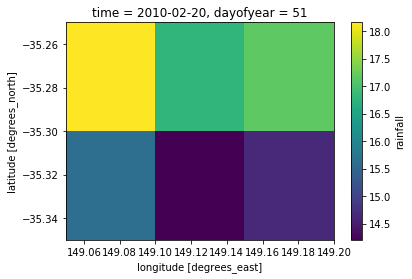

In [45]:
mass_residual.isel(time=50).plot()

__Future additions:__

_calculate metrics based on residual rainfall_
- increasing and decreasing periods
- wet year after dry years
- dry year after wet years

_calculate seasonality_
- Koppen climate region (use notebook to follow decision tree - requires climate data)
- Summer dominant, Summer, Uniform, Winter, Winter dominant #
- TROP SOI value
- IOD /SAM indices

"During El Niño, rainfall in eastern Australian is typically below average during winter and spring. A neutral ENSO phase has little effect on Australian climate."Bureau of meteorology http://www.bom.gov.au/climate/enso/  

_Calculate failed wet seasons 
- calculate total wet season + dry season rainfalls
- end of wet season rainfalls?
